In [6]:
#  SKlearn에서 모델 선택  --------------------------------------

# - 가장 기본 매개변수 값으로 모델 학습
# - 모델 선택 기준 ==> 평가지표에 따라서 선택
# 하이퍼 파라미터 튜닝을 따로 해야함

from sklearn.utils import *
from sklearn.datasets import load_iris
from sklearn.metrics import *
import warnings

rets=all_estimators(type_filter='regressor') # 찾는 항목 넣기

'''
'classifier': 분류기(Classifier) 클래스
'regressor': 회귀기(Regressor) 클래스
'transformer': 변환기(Transformer) 클래스
'cluster': 군집화(Cluster) 클래스
'meta-estimator': 메타 추정기(Meta-Estimator) 클래스
'outlier': 이상치 검출(Outlier Detection) 클래스
'meta': 메타 클래스 (예: StackingClassifier, StackingRegressor 등)
'''

"\n'classifier': 분류기(Classifier) 클래스\n'regressor': 회귀기(Regressor) 클래스\n'transformer': 변환기(Transformer) 클래스\n'cluster': 군집화(Cluster) 클래스\n'meta-estimator': 메타 추정기(Meta-Estimator) 클래스\n'outlier': 이상치 검출(Outlier Detection) 클래스\n'meta': 메타 클래스 (예: StackingClassifier, StackingRegressor 등)\n"

In [7]:
import pandas as pd
file='../project/player_real_final.csv'
df=pd.read_csv(file)
df.columns

Index(['name', 'overall', 'potential', 'value_euro', 'wage_eruo', 'player_url',
       'player_face_url', 'age', 'height_cm', 'weight_kg', 'club', 'league',
       'position', 'attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping'],
      dtype='object')

In [8]:
df=df[['overall', 'potential','attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping','value_euro']] 

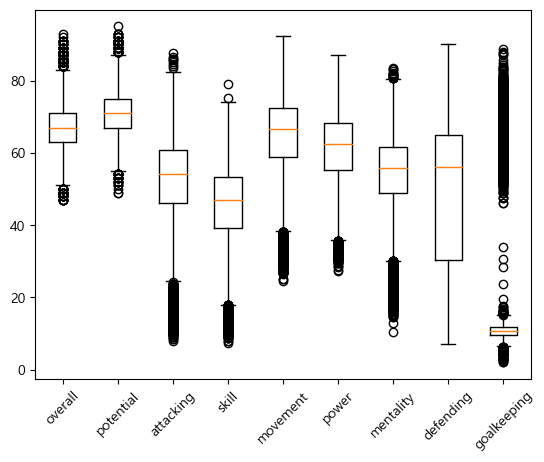

In [9]:
import matplotlib.pyplot as plt 

plt.boxplot(df.iloc[:,:-1], labels=df.columns[:-1])
plt.xticks(rotation=45)
plt.show()

In [10]:
# 이상치가 많을 때 StandardScaler 말고 => RobustScaler 사용
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_s=scaler.fit_transform(df)

In [11]:
df_s=pd.DataFrame(df_s)
df_s.columns=['overall', 'potential','attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping','value_euro'] 
df_s

,overall,potential,attacking,skill,movement,power,mentality,defending,goalkeeping,value_euro
0,3.250,2.750,2.164384,2.258824,1.735294,1.184615,1.434211,-0.798561,0.090909,39.896104
1,3.125,2.625,2.178082,1.517647,1.102941,1.723077,1.973684,-0.604317,-0.181818,61.454545
2,3.000,2.500,2.287671,1.658824,1.382353,1.907692,1.473684,-0.791367,0.454545,22.753247
3,3.000,2.500,1.808219,1.988235,1.735294,0.723077,1.684211,-0.654676,0.545455,66.389610
4,3.000,2.500,1.863014,1.905882,0.985294,1.476923,2.131579,0.187050,0.272727,64.571429
...,...,...,...,...,...,...,...,...,...,...
15081,-2.500,-2.000,-2.863014,-2.494118,-2.397059,-2.076923,-3.039474,-1.323741,16.181818,-0.576623
15082,-2.500,-0.875,-1.027397,-0.952941,-0.308824,-1.092308,-0.671053,-0.417266,0.727273,-0.561039
15083,-2.500,-1.250,-0.904110,-0.882353,-0.926471,-1.615385,-1.184211,-0.884892,0.090909,-0.566234
15084,-2.500,-1.500,-0.753425,-0.741176,-0.485294,-1.046154,-0.723684,-0.395683,-0.545455,-0.566234


In [12]:
df_s.corr()['value_euro']

overall        0.589850
potential      0.569162
attacking      0.261434
skill          0.269617
movement       0.242749
power          0.275179
mentality      0.295881
defending      0.116760
goalkeeping   -0.024903
value_euro     1.000000
Name: value_euro, dtype: float64

In [13]:
df_s.describe()

,overall,potential,attacking,skill,movement,power,mentality,defending,goalkeeping,value_euro
count,15086.000000,15086.000000,15086.000000,15086.000000,15086.000000,15086.000000,15086.000000,15086.000000,15086.000000,15086.000000
mean,0.040087,0.063759,-0.207009,-0.173778,-0.150068,-0.105347,-0.155945,-0.214212,2.637292,1.145914
std,0.793120,0.751493,1.023804,0.934212,0.828001,0.774264,0.977646,0.581658,7.864931,4.401332
min,-2.500000,-2.750000,-3.178082,-2.800000,-3.102941,-2.692308,-3.565789,-1.410072,-3.909091,-0.618701
25%,-0.500000,-0.500000,-0.547945,-0.552941,-0.573529,-0.553846,-0.526316,-0.741007,-0.454545,-0.324675
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.452055,0.447059,0.426471,0.446154,0.473684,0.258993,0.545455,0.675325
max,3.250000,3.000000,2.287671,2.258824,1.897059,1.907692,2.197368,0.985612,35.545455,100.155844


In [14]:
feature=df_s[['attacking', 'skill', 'movement', 'power', 'mentality','defending', 'goalkeeping']]
# 'overall', 'potential', 

target=df_s['value_euro']

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, 
                                                    test_size=0.2, random_state=4 )
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                                                    test_size=0.2, random_state=4 )

In [12]:
result=[]
for name, estimator_ in rets:
    try:
        model=estimator_()
        if 'Logistic' in name or 'SGD' in name or 'MLP' in name:
            model.set_params(max_iter=10000)
        if 'SV' in name:
            model.set_params(max_iter=100000, dual='auto')   
 
        model.fit(train_x,train_y)
        sc=model.score(test_x,test_y)
        sc_v=model.score(val_x,val_y)
        sc_t=model.score(train_x,train_y)
        result.append((name, round(sc, 2), round(sc_v, 2),round(sc_t, 2)))
    except Exception:
        pass

sorted(result, key=lambda x : x[1], reverse=True)

# 높은 score의 모델이 없어 feature 조정

c:\Users\KDP-26-\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
c:\Users\KDP-26-\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


[('ExtraTreesRegressor', 0.76, 0.66, 1.0),
 ('HistGradientBoostingRegressor', 0.76, 0.63, 0.86),
 ('MLPRegressor', 0.76, 0.67, 0.75),
 ('RandomForestRegressor', 0.76, 0.66, 0.96),
 ('GradientBoostingRegressor', 0.74, 0.64, 0.87),
 ('BaggingRegressor', 0.73, 0.64, 0.94),
 ('KNeighborsRegressor', 0.66, 0.57, 0.73),
 ('ExtraTreeRegressor', 0.4, 0.24, 1.0),
 ('DecisionTreeRegressor', 0.33, 0.47, 1.0),
 ('ARDRegression', 0.24, 0.19, 0.22),
 ('BayesianRidge', 0.24, 0.19, 0.22),
 ('ElasticNetCV', 0.24, 0.19, 0.22),
 ('Lars', 0.24, 0.19, 0.22),
 ('LarsCV', 0.24, 0.19, 0.22),
 ('LassoCV', 0.24, 0.19, 0.22),
 ('LassoLarsCV', 0.24, 0.19, 0.22),
 ('LassoLarsIC', 0.24, 0.19, 0.22),
 ('LinearRegression', 0.24, 0.19, 0.22),
 ('OrthogonalMatchingPursuitCV', 0.24, 0.18, 0.22),
 ('Ridge', 0.24, 0.19, 0.22),
 ('RidgeCV', 0.24, 0.19, 0.22),
 ('SGDRegressor', 0.24, 0.19, 0.22),
 ('TransformedTargetRegressor', 0.24, 0.19, 0.22),
 ('PLSRegression', 0.21, 0.15, 0.19),
 ('KernelRidge', 0.19, 0.14, 0.17),
 ('Tw

In [15]:
feature=df_s[['overall', 'potential']] 
# ,'age','attacking', 'skill', 'movement', 'power', 'mentality','defending', 'goalkeeping' 
target=df_s['value_euro']

In [16]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, 
                                                    test_size=0.2, random_state=4 )
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                                                    test_size=0.2, random_state=4 )

In [18]:
result=[]
for name, estimator_ in rets:
    try:
        model=estimator_()
        if 'Logistic' in name or 'SGD' in name or 'MLP' in name:
            model.set_params(max_iter=10000)
        if 'SV' in name:
            model.set_params(max_iter=100000, dual='auto')   
 
        model.fit(train_x,train_y)
        sc=model.score(test_x,test_y)
        sc_v=model.score(val_x,val_y)
        sc_t=model.score(train_x,train_y)
        result.append((name, round(sc, 2), round(sc_v, 2),round(sc_t, 2)))
    except Exception:
        pass

sorted(result, key=lambda x : x[1], reverse=True)

c:\Users\KDP-26-\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


[('HistGradientBoostingRegressor', 0.95, 0.94, 0.92),
 ('MLPRegressor', 0.95, 0.94, 0.92),
 ('KNeighborsRegressor', 0.92, 0.94, 0.93),
 ('BaggingRegressor', 0.91, 0.95, 0.95),
 ('RandomForestRegressor', 0.91, 0.95, 0.95),
 ('GradientBoostingRegressor', 0.9, 0.95, 0.94),
 ('DecisionTreeRegressor', 0.89, 0.95, 0.95),
 ('ExtraTreeRegressor', 0.89, 0.95, 0.95),
 ('ExtraTreesRegressor', 0.89, 0.95, 0.95),
 ('AdaBoostRegressor', 0.88, 0.87, 0.89),
 ('RadiusNeighborsRegressor', 0.85, 0.82, 0.82),
 ('ARDRegression', 0.42, 0.37, 0.39),
 ('BayesianRidge', 0.42, 0.37, 0.39),
 ('ElasticNetCV', 0.42, 0.38, 0.39),
 ('Lars', 0.42, 0.37, 0.39),
 ('LarsCV', 0.42, 0.37, 0.39),
 ('LassoCV', 0.42, 0.37, 0.39),
 ('LassoLarsCV', 0.42, 0.37, 0.39),
 ('LassoLarsIC', 0.42, 0.37, 0.39),
 ('LinearRegression', 0.42, 0.37, 0.39),
 ('OrthogonalMatchingPursuitCV', 0.42, 0.37, 0.39),
 ('PLSRegression', 0.42, 0.37, 0.39),
 ('Ridge', 0.42, 0.37, 0.39),
 ('RidgeCV', 0.42, 0.37, 0.39),
 ('SGDRegressor', 0.42, 0.37, 0.39)